Author: Naomi Baes and Chat GPT

Description: This script processes cosine similarity scores extracted from files in a specified folder, calculates average scores across epochs and terms ('mental_health' or 'mental_illness') for different corpora ('cohacoca' or 'psych'), and then saves the results into a structured CSV file containing epoch, cosine dissimilarity, term, and corpus information.

In [24]:
import os
import numpy as np
import pandas as pd

In [25]:
def process_file(file_path):
    # Extract the relevant information from the file name
    file_name = os.path.basename(file_path)
    parts = file_name.split(".")
    
    # Extract epoch, term, and corpus information from the file name
    epoch = parts[3]  # Extract the epoch from the file name
    term = parts[0]  # Extract the term ('mental_health' or 'mental_illness')
    corpus = parts[2]  # Extract the corpus ('cohacoca' or 'psych')
    print(f"File Name: {file_name}, Epoch: {epoch}, Term: {term}, Corpus: {corpus}")
    
    # Read the cosine similarity scores from the file
    cosine_scores = np.loadtxt(file_path)
    # Calculate the average cosine dissimilarity score
    avg_cosine_dissim = np.mean(cosine_scores)
    
    return epoch, avg_cosine_dissim, term, corpus

# Psychology: Compute mean pooled cosine dissimilarity scores over epochs and target terms

In [31]:
import os
import numpy as np
import pandas as pd

def process_file(file_path):
    # Extract the relevant information from the file name
    file_name = os.path.basename(file_path)
    parts = file_name.split(".")
    
    # Extract epoch, term, and corpus information from the file name
    epoch = parts[1]  # Extract the epoch from the file name
    term = parts[0]  # Extract the term ('mental_health', 'mental_illness', or 'perception')
    corpus = parts[2]  # Extract the corpus ('cohacoca' or 'psych')
    print(f"File Name: {file_name}, Epoch: {epoch}, Term: {term}, Corpus: {corpus}")
    
    # Read the cosine similarity scores from the file
    try:
        cosine_scores = np.loadtxt(file_path)
        # Calculate the average cosine dissimilarity score
        avg_cosine_dissim = np.mean(cosine_scores)
    except Exception as e:
        print(f"Error reading or processing file {file_path}: {e}")
        return None

    return epoch, avg_cosine_dissim, term, corpus

def main(folder_path):
    epoch_scores = {}
    
    # Process each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path) and file_name.endswith("_cds_mpnet") and 'psych' in file_name:
            # Process the file to get the epoch, average cosine dissimilarity, term, and corpus
            result = process_file(file_path)
            if result is None:
                continue
            epoch, avg_cosine_dissim, term, corpus = result
            
            # Only consider files with 'psych' corpus
            if corpus == 'psych':
                if epoch not in epoch_scores:
                    epoch_scores[epoch] = {'mental_health': [], 'mental_illness': [], 'perception': []}
                    
                # Append the average cosine dissimilarity to the corresponding epoch and term
                if 'mental_health' in term:
                    epoch_scores[epoch]['mental_health'].append(avg_cosine_dissim)
                elif 'mental_illness' in term:
                    epoch_scores[epoch]['mental_illness'].append(avg_cosine_dissim)
                elif 'perception' in term:
                    epoch_scores[epoch]['perception'].append(avg_cosine_dissim)

    # Calculate the final average cosine dissimilarity and standard deviation for each epoch
    final_scores = []
    for epoch, scores in sorted(epoch_scores.items()):
        avg_cosine_dissim_health = np.mean(scores['mental_health']) if scores['mental_health'] else np.nan
        avg_cosine_dissim_illness = np.mean(scores['mental_illness']) if scores['mental_illness'] else np.nan
        avg_cosine_dissim_perception = np.mean(scores['perception']) if scores['perception'] else np.nan
        std_cosine_dissim_health = np.std(scores['mental_health']) if scores['mental_health'] else np.nan
        std_cosine_dissim_illness = np.std(scores['mental_illness']) if scores['mental_illness'] else np.nan
        std_cosine_dissim_perception = np.std(scores['perception']) if scores['perception'] else np.nan
        
        # Append mean and standard deviation rows for each category (mental_health, mental_illness, and perception)
        final_scores.append((epoch, avg_cosine_dissim_health, std_cosine_dissim_health, 'mental_health', 'psych'))
        final_scores.append((epoch, avg_cosine_dissim_illness, std_cosine_dissim_illness, 'mental_illness', 'psych'))
        final_scores.append((epoch, avg_cosine_dissim_perception, std_cosine_dissim_perception, 'perception', 'psych'))
    
    # Convert the list to a DataFrame
    df = pd.DataFrame(final_scores, columns=["epoch", "cosine_dissim_mean", "cosine_dissim_std", "term", "corpus"])

    # Sort the DataFrame by epoch
    df = df.sort_values(by=["epoch"])

    # Save the DataFrame to a CSV file
    output_file = "output/combined.5-year.cds_mpnet.psych.csv"
    df.to_csv(output_file, index=False)
    print(f"Saved the psych 5-year cosine scores with mean and std for 'psych' corpus to: {output_file}")

# Specify the folder path containing the input files when calling the function
folder_path = "output/5-year.cosine"
main(folder_path)

File Name: mental_health.1970-1974.psych.10_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.1_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.2_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.3_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.4_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.5_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.6_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.7_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.psych.8_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: psych
File Name: mental_health.1970-1974.p

# COHACOCA: Compute mean pooled cosine dissimilarity scores over epochs and target terms

In [33]:
import os
import numpy as np
import pandas as pd

def process_file(file_path):
    # Extract the relevant information from the file name
    file_name = os.path.basename(file_path)
    parts = file_name.split(".")
    
    # Extract epoch, term, and corpus information from the file name
    epoch = parts[1]  # Extract the epoch from the file name
    term = parts[0]  # Extract the term ('mental_health', 'mental_illness', or 'perception')
    corpus = parts[2]  # Extract the corpus ('cohacoca' or 'cohacoca')
    print(f"File Name: {file_name}, Epoch: {epoch}, Term: {term}, Corpus: {corpus}")
    
    # Read the cosine similarity scores from the file
    try:
        cosine_scores = np.loadtxt(file_path)
        # Calculate the average cosine dissimilarity score
        avg_cosine_dissim = np.mean(cosine_scores)
    except Exception as e:
        print(f"Error reading or processing file {file_path}: {e}")
        return None

    return epoch, avg_cosine_dissim, term, corpus

def main(folder_path):
    epoch_scores = {}
    
    # Process each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path) and file_name.endswith("_cds_mpnet") and 'cohacoca' in file_name:
            # Process the file to get the epoch, average cosine dissimilarity, term, and corpus
            result = process_file(file_path)
            if result is None:
                continue
            epoch, avg_cosine_dissim, term, corpus = result
            
            # Only consider files with 'cohacoca' corpus
            if corpus == 'cohacoca':
                if epoch not in epoch_scores:
                    epoch_scores[epoch] = {'mental_health': [], 'mental_illness': [], 'perception': []}
                    
                # Append the average cosine dissimilarity to the corresponding epoch and term
                if 'mental_health' in term:
                    epoch_scores[epoch]['mental_health'].append(avg_cosine_dissim)
                elif 'mental_illness' in term:
                    epoch_scores[epoch]['mental_illness'].append(avg_cosine_dissim)
                elif 'perception' in term:
                    epoch_scores[epoch]['perception'].append(avg_cosine_dissim)

    # Calculate the final average cosine dissimilarity and standard deviation for each epoch
    final_scores = []
    for epoch, scores in sorted(epoch_scores.items()):
        avg_cosine_dissim_health = np.mean(scores['mental_health']) if scores['mental_health'] else np.nan
        avg_cosine_dissim_illness = np.mean(scores['mental_illness']) if scores['mental_illness'] else np.nan
        avg_cosine_dissim_perception = np.mean(scores['perception']) if scores['perception'] else np.nan
        std_cosine_dissim_health = np.std(scores['mental_health']) if scores['mental_health'] else np.nan
        std_cosine_dissim_illness = np.std(scores['mental_illness']) if scores['mental_illness'] else np.nan
        std_cosine_dissim_perception = np.std(scores['perception']) if scores['perception'] else np.nan
        
        # Append mean and standard deviation rows for each category (mental_health, mental_illness, and perception)
        final_scores.append((epoch, avg_cosine_dissim_health, std_cosine_dissim_health, 'mental_health', 'cohacoca'))
        final_scores.append((epoch, avg_cosine_dissim_illness, std_cosine_dissim_illness, 'mental_illness', 'cohacoca'))
        final_scores.append((epoch, avg_cosine_dissim_perception, std_cosine_dissim_perception, 'perception', 'cohacoca'))
    
    # Convert the list to a DataFrame
    df = pd.DataFrame(final_scores, columns=["epoch", "cosine_dissim_mean", "cosine_dissim_std", "term", "corpus"])

    # Sort the DataFrame by epoch
    df = df.sort_values(by=["epoch"])

    # Save the DataFrame to a CSV file
    output_file = "output/combined.5-year.cds_mpnet.cohacoca.csv"
    df.to_csv(output_file, index=False)
    print(f"Saved the cohacoca 5-year cosine scores with mean and std for 'cohacoca' corpus to: {output_file}")

# Specify the folder path containing the input files when calling the function
folder_path = "output/5-year.cosine"
main(folder_path)

File Name: mental_health.1970-1974.cohacoca.10_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.1_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.2_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.3_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.4_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.5_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.6_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.7_cds_mpnet, Epoch: 1970-1974, Term: mental_health, Corpus: cohacoca
File Name: mental_health.1970-1974.cohacoca.8_cds_mpnet, Epoch: 1970-1974, Term: mental_health,

# Combined data frame

In [35]:
import pandas as pd

def combine_csv_files(file1, file2, output_file):
    # Read the CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    # Concatenate the DataFrames
    combined_df = pd.concat([df1, df2], ignore_index=True)
    
    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined CSV file saved to: {output_file}")

# Define the file paths
file1 = "output/combined.5-year.cds_mpnet.psych.csv"
file2 = "output/combined.5-year.cds_mpnet.cohacoca.csv"
output_file = "output/combined.5-year.cds_mpnet.corpora.csv"

# Combine the CSV files
combine_csv_files(file1, file2, output_file)

Combined CSV file saved to: output/combined.5-year.cds_mpnet.corpora.csv


# Plot the mean cosine dissimilarity scores

Successfully read data from CSV file.


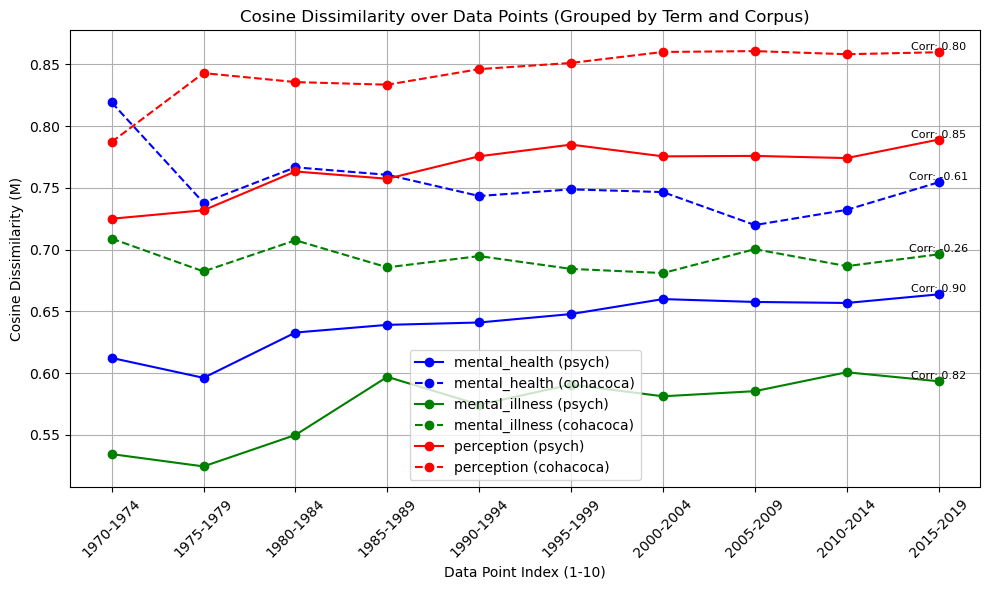

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    df = pd.read_csv("output/combined.5-year.cds_mpnet.corpora.csv")
    print("Successfully read data from CSV file.")
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")

# Define colors and linestyles for each term and corpus
colors = {'mental_health': 'b', 'mental_illness': 'g', 'perception': 'r'}
linestyles = {'psych': '-', 'cohacoca': '--'}

# Plot data with color/linestyle distinction
plt.figure(figsize=(10, 6))

# Iterate over each term and plot with corresponding color and linestyle
for term in ['mental_health', 'mental_illness', 'perception']:
    for corpus in ['psych', 'cohacoca']:
        data = df[(df['term'] == term) & (df['corpus'] == corpus)]
        label = f'{term} ({corpus})'

        # Sample the mean cosine dissimilarity values (10 points)
        y_values = data['cosine_dissim_mean'].iloc[:10].to_numpy()  # Select first 10 values

        # Plot against the integer x-values (1 to 10)
        x_values = np.arange(1, 11)
        plt.plot(x_values, y_values,
                 label=label, color=colors[term], linestyle=linestyles[corpus], marker='o')

        # Calculate correlation coefficient between x_values and y_values
        correlation = np.corrcoef(x_values, y_values)[0, 1]

        # Add text with correlation coefficient near the last data point
        plt.text(x_values[-1], y_values[-1],
                 f'Corr: {correlation:.2f}', fontsize=8, ha='center', va='bottom')

# Set labels and title
plt.xlabel('Data Point Index (1-10)')
plt.ylabel('Cosine Dissimilarity (M)')
plt.title('Cosine Dissimilarity over Data Points (Grouped by Term and Corpus)')

# Add a secondary x-axis with datetime labels
epochs = df['epoch'].unique()[:10]  # Select first 10 unique epochs
epoch_indices = np.arange(1, 11)  # Corresponding indices for the epochs
plt.xticks(epoch_indices, epochs, rotation=45)  # Set the ticks and labels for the secondary x-axis

# Show the legend and plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot the standard deviation cosine dissimilarity scores

Successfully read data from CSV file.


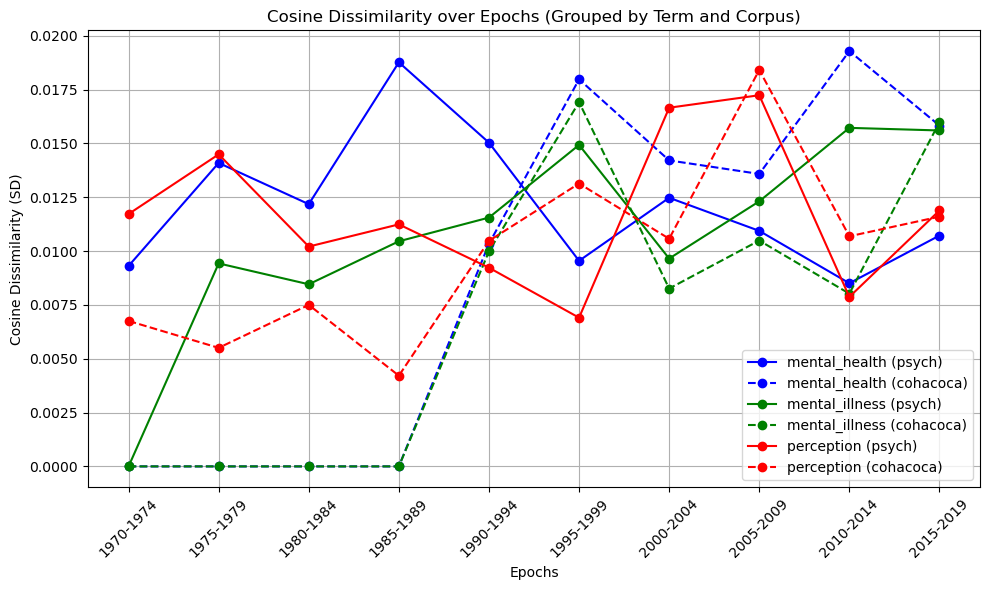

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("output/combined.5-year.cds_mpnet.corpora.csv")
    print("Successfully read data from CSV file.")
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")

# Define colors and linestyles for each group
colors = ['b', 'g', 'r']  # Blue for 'psych', Green for 'cohacoca', Red for 'perception'
linestyles = ['-', '--']  # Line styles for mental_health and mental_illness

# Plot data with color/linestyle distinction
plt.figure(figsize=(10, 6))

# Iterate over each term and plot with corresponding color and linestyle
for i, term in enumerate(['mental_health', 'mental_illness', 'perception']):
    for j, corpus in enumerate(['psych', 'cohacoca']):
        data = df[(df['term'] == term) & (df['corpus'] == corpus)]
        label = f'{term} ({corpus})'
        plt.plot(data['epoch'], data['cosine_dissim_std'], 
                 label=label, color=colors[i], linestyle=linestyles[j], marker='o')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Cosine Dissimilarity (SD)')
plt.title('Cosine Dissimilarity over Epochs (Grouped by Term and Corpus)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
